In [1]:
import torch
import time

import sys
import os
sys.path.insert(0, os.path.abspath("../marl_env"))

from matplotlib import pyplot as plt
from trainer import DeepQTrainer
from environment import MultiAgentEnvironment

%matplotlib inline

/Users/BenjaminSuter/Documents/My Files/COSS/agent_env/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [2]:
agent_dict = {
    'sellers': {
        1: {
            'type': 'HumanReplayAgent',
            'reservation': 68,
            'multiplicity': 1,
            **{'id': 1022},
        },
        2: {
            'type': 'HumanReplayAgent',
            'reservation': 73,
            'multiplicity': 1,
            **{'id': 1024},
        },
        3: {
            'type': 'HumanReplayAgent',
            'reservation': 88,
            'multiplicity': 1,
            **{'id': 1030},
        },
        4: {
            'type': 'HumanReplayAgent',
            'reservation': 98,
            'multiplicity': 1,
            **{'id': 1034},
        },
        5: {
            'type': 'HumanReplayAgent',
            'reservation': 78,
            'multiplicity': 1,
            **{'id': 1026},
        },
        6: {
            'type': 'HumanReplayAgent',
            'reservation': 68,
            'multiplicity': 1,
            **{'id': 1002},
        },
        7: {
            'type': 'HumanReplayAgent',
            'reservation': 88,
            'multiplicity': 1,
            **{'id': 1010},
        },
        8: {
            'type': 'HumanReplayAgent',
            'reservation': 83,
            'multiplicity': 1,
            **{'id': 1008},
        },
        9: {
            'type': 'HumanReplayAgent',
            'reservation': 73,
            'multiplicity': 1,
            **{'id': 1004},
        },
        10: {
            'type': 'HumanReplayAgent',
            'reservation': 93,
            'multiplicity': 1,
            **{'id': 1012},
        },
    },
    'buyers': {
        1: {
            'type': 'DQNAgent',
            'reservation': 128,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        2: {
            'type': 'DQNAgent',
            'reservation': 73,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        3: {
            'type': 'DQNAgent',
            'reservation': 150,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        4: {
            'type': 'DQNAgent',
            'reservation': 70,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        5: {
            'type': 'DQNAgent',
            'reservation': 72,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        6: {
            'type': 'DQNAgent',
            'reservation': 90,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        7: {
            'type': 'DQNAgent',
            'reservation': 105,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        8: {
            'type': 'DQNAgent',
            'reservation': 133,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        9: {
            'type': 'DQNAgent',
            'reservation': 107,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
        10: {
            'type': 'DQNAgent',
            'reservation': 148,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
    }
}

Per default, we are using the FullLimS implementation of the HumanReplayData setting. All possible agent IDs and
reservation prices for FullLimS sellers can be found on the GitHub via this link:

https://github.com/jan-engelmann/multi-agent-market-rl/blob/main/HumanReplayData/NewData/Id_and_Reservations/FullLimS_Sellers.csv


In [ ]:
kwargs = {
    'market_settings': {},
    'info_settings': {},
    'exploration_settings': {'n_expo_steps': 100,
                             'final_expo': 0.05},
    'reward_settings': {'no_deal_max': 5}
}

env = MultiAgentEnvironment(
    agent_dict,
    'MarketMatchHiLo',
    'BlackBoxSetting',
    'LinearExplorationDecline',
    'NoDealPenaltyReward',
    **kwargs
)

In [4]:
n_episodes = 10
batch_size = 16
mem_size = 150
start_size = 100

train_params = {'discount': 0.3,
                'update_frq': 250,
                'loss_min': -50,
                'loss_max': 50,
                'save_weights': True}

trainer = DeepQTrainer(env, mem_size, start_size, **train_params)

10  episodes takes about 1 minute. We should really try to benchmark the performance speed compared to a GPU.

In [ ]:
tt = time.time()
total_loss, total_rew, actions = trainer.train(n_episodes, batch_size)
print("Total time in s: ", time.time() - tt)

tot_loss = torch.stack(total_loss, dim=0).transpose(0, 1).detach()
tot_rew = torch.stack(total_rew, dim=0).squeeze().transpose(0, 1).detach()
actions = torch.stack(actions, dim=0).transpose(0, 1).detach()

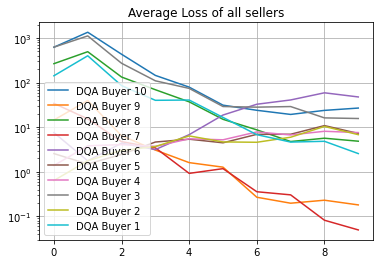

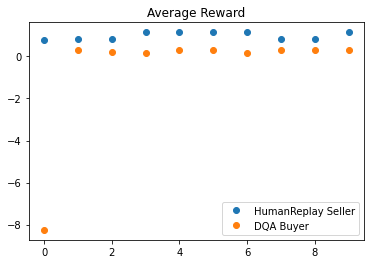

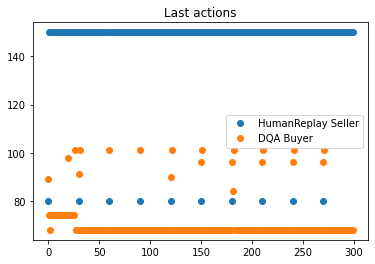

In [15]:
plt.figure()
plt.title("Average Loss of all sellers")
i = -1
while -1*i <= env.n_buyers:
    plt.semilogy(tot_loss[i, :], label=f"DQA Buyer {i + env.n_buyers + 1}")
    i -= 1
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.title("Average Reward")
plt.plot(tot_rew[0, :], 'o', label="HumanReplay Seller")
plt.plot(tot_rew[-4, :], 'o', label="DQA Buyer")
plt.legend()
plt.show()

plt.figure()
plt.title("Last actions")
plt.plot(actions[0, :], 'o', label="HumanReplay Seller")
plt.plot(actions[-4, :], 'o', label="DQA Buyer")
plt.legend()
plt.show()